In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [17]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    costs = []
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        cost = -1 / m * np.sum(np.log(A2) * one_hot(Y))
        costs.append(cost)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Cost: {cost},Accuracy: {accuracy}")
    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Gradient Descent Cost')
    plt.show()
    return W1, b1, W2, b2

[0 0 0 ... 0 0 0] [3 4 2 ... 9 0 8]
Iteration: 0, Cost: 2.2748346500034407,Accuracy: 0.08634146341463414
[0 0 0 ... 0 0 0] [3 4 2 ... 9 0 8]
Iteration: 10, Cost: 2.240163935986735,Accuracy: 0.09346341463414634
[0 0 0 ... 9 0 0] [3 4 2 ... 9 0 8]
Iteration: 20, Cost: 2.20909476290653,Accuracy: 0.11829268292682926
[3 0 0 ... 9 0 0] [3 4 2 ... 9 0 8]
Iteration: 30, Cost: 2.180308000607266,Accuracy: 0.16895121951219513
[3 5 0 ... 9 0 0] [3 4 2 ... 9 0 8]
Iteration: 40, Cost: 2.153257553249376,Accuracy: 0.22053658536585366
[3 5 0 ... 9 0 3] [3 4 2 ... 9 0 8]
Iteration: 50, Cost: 2.127399367033087,Accuracy: 0.26146341463414635
[3 5 0 ... 9 0 3] [3 4 2 ... 9 0 8]
Iteration: 60, Cost: 2.1019712961618553,Accuracy: 0.29185365853658535
[3 5 0 ... 9 0 3] [3 4 2 ... 9 0 8]
Iteration: 70, Cost: 2.076366362729322,Accuracy: 0.31490243902439025
[3 5 0 ... 9 0 3] [3 4 2 ... 9 0 8]
Iteration: 80, Cost: 2.0500112999133786,Accuracy: 0.33270731707317075
[3 5 0 ... 9 0 3] [3 4 2 ... 9 0 8]
Iteration: 90, Cos

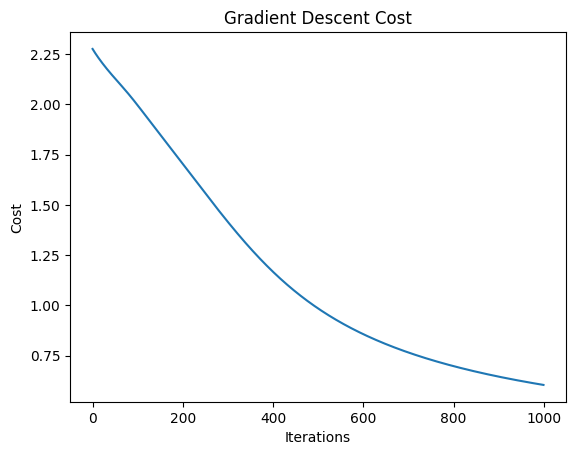

In [18]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.01, 1000)

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]

    current_image = current_image.reshape((28, 28)) * 255

    plt.subplot(5, 5, index + 1)  # 2 rows, 5 columns, index + 1 to start from 1
    plt.imshow(current_image, cmap='gray', interpolation='nearest')
    plt.title(f"Prediction: {prediction}, Label: {label}")
    plt.axis('off')

In [22]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 9 9 8 7 6 9 4 6 2 2 9 4 7 2 8 8 0 9 3 8 1 4 0 5 6 5 9 8 6 5 3 4 0 4 2 6
 4 9 4 6 6 3 1 3 5 2 4 6 9 1 9 3 1 4 3 3 0 3 8 6 7 0 0 4 7 4 6 1 1 7 4 9 8
 6 1 9 0 3 2 8 8 7 2 1 1 0 9 3 3 2 6 3 8 8 4 1 6 7 4 3 2 4 5 7 4 0 1 6 3 3
 2 8 1 6 5 8 6 6 0 8 3 1 0 8 5 9 8 3 8 1 6 4 7 7 0 6 3 6 0 9 2 1 5 1 6 4 8
 9 6 0 3 6 8 1 8 0 4 9 2 7 1 3 8 1 5 0 1 3 2 4 1 1 3 5 3 9 6 0 6 4 1 1 0 6
 9 4 7 9 7 9 9 8 1 5 0 6 0 8 5 3 9 8 2 2 3 6 1 3 1 1 3 7 1 9 3 7 7 3 4 8 5
 9 8 5 9 7 8 4 7 0 9 9 2 1 3 6 7 8 2 4 2 6 3 2 0 4 1 1 7 5 2 3 3 0 2 4 4 4
 5 6 1 9 5 1 3 7 4 6 3 6 1 8 2 0 8 8 4 4 3 1 7 3 9 5 0 2 9 8 4 7 3 6 8 8 8
 6 6 6 0 4 2 6 2 6 1 8 0 5 1 9 8 5 4 1 8 7 6 5 7 4 0 0 9 1 3 3 0 2 2 1 0 5
 3 4 2 8 9 2 5 1 0 0 5 8 8 9 3 8 9 2 7 6 4 7 3 7 5 5 7 3 7 1 3 8 9 6 5 2 4
 3 4 2 6 6 6 6 9 5 2 7 1 9 6 5 7 6 3 2 6 1 5 1 8 4 0 3 5 9 7 9 6 3 7 1 6 7
 4 2 2 6 3 9 7 0 8 0 3 9 5 9 8 0 7 8 7 3 9 0 4 0 2 7 7 7 7 1 3 9 8 5 8 3 3
 3 6 3 0 7 8 8 5 9 6 3 8 3 0 7 1 7 0 1 2 6 7 4 2 5 6 0 9 4 2 0 1 1 4 9 3 6
 8 1 3 7 4 9 2 3 4 5 1 2 

0.829

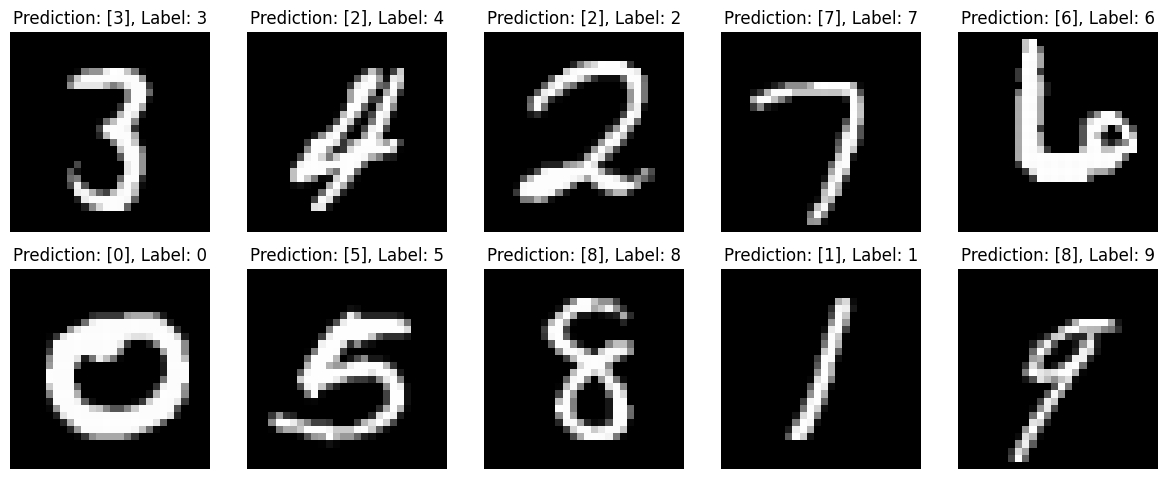

In [21]:
# Create a figure with 2 rows and 5 columns
plt.figure(figsize=(12, 12))

# Test each sample and display in a grid pattern
for i in range(10):
    test_prediction(i, W1, b1, W2, b2)

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        86
           1       0.97      0.98      0.98       119
           2       0.93      0.95      0.94        98
           3       0.92      0.89      0.91        97
           4       0.95      0.91      0.93        92
           5       0.93      0.90      0.91       100
           6       0.95      0.93      0.94       107
           7       0.94      0.92      0.93       103
           8       0.94      0.93      0.94       110
           9       0.82      0.92      0.87        88

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



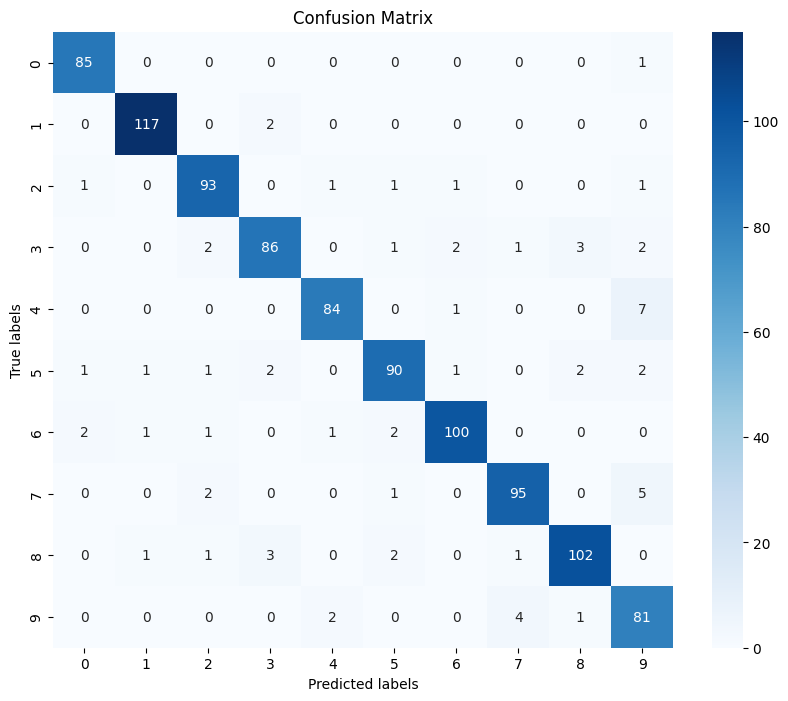

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_dev, dev_predictions))
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate predictions for the development set
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)

# Print confusion matrix
conf_matrix = confusion_matrix(Y_dev, dev_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(Y_dev), yticklabels=np.unique(Y_dev))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()